In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.linear_model import LogisticRegression

In [3]:
import os.path as p

path = p.abspath('heart.csv')

In [4]:
heart_data = pd.read_csv(path)

In [5]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
heart_data['target'].value_counts()

target
1    165
0    138
Name: count, dtype: int64

In [9]:
x = heart_data.drop(columns = ['target'], axis = 1)
y = heart_data['target']

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [12]:
scaler.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [24]:
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [25]:
model = LogisticRegression( )

In [26]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [27]:
y_predict = model.predict(X_test)

In [28]:
print(accuracy_score(y_test,y_predict))

0.8688524590163934


In [35]:
cf_matrix = confusion_matrix(y_test, y_predict)
print(cf_matrix)

[[25  7]
 [ 1 28]]


In [36]:
tn, fb, fn, tb = cf_matrix.ravel()

print(tn, fb, fn, tb)

25 7 1 28


<Axes: >

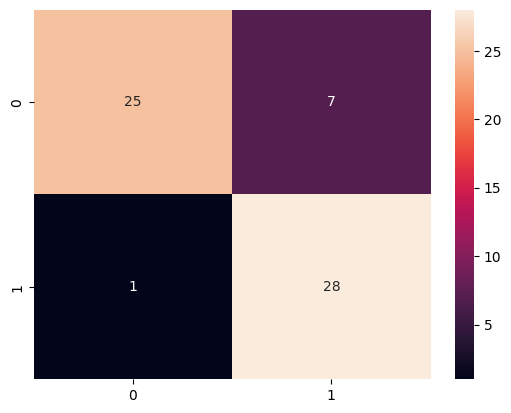

In [37]:
import seaborn as sns

sns.heatmap(cf_matrix, annot = True)

In [38]:
from sklearn.metrics import recall_score, precision_score

In [46]:
print(f'{precision_score(y_test, y_predict ) * 100:.0f}%')

80%


In [47]:
print(f'{recall_score(y_test, y_predict) * 100 :.0f}%')

97%


In [49]:
from sklearn.metrics import f1_score


In [54]:
print(f'{f1_score(y_test, y_predict) * 100 :.0f}%')

88%


In [59]:
def percision_recall_f1() : 
    
    percision = (tb) / (tb + fb)
    
    recall = (tb) / (tb + fn)
    
    f1 = 2* ((percision * recall) / (percision + recall))
    
    option = input('Enter from percision or recall or f1 score').lower()
    match option : 
        
        case 'percision' | 'p' : 
            
            print(f'{percision * 100 :.0f}%')
        
        case 'recall' |'r' : 
            
            print(f'{recall * 100 :.0f}%')
        
        case 'f1' | 'f' :
            
            print(f'{f1 *100 :.0f}%')
        case _ :
            
            print("Thats Not True Input")

In [60]:
percision_recall_f1()

80%
